In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats
import analysis_perDRG
import scikit_posthocs as sp

In [2]:
name = 'd7LperDRG_'

with open('D7_SNI_area.json') as f:
    results_sni = json.load(f)
with open('D7_Sham_area.json') as f:
    results_sham = json.load(f)

In [3]:
sham_l4il = analysis_perDRG.GroupData(results_sham, 'L4IL', number_of_rats=6)
sham_l4cl = analysis_perDRG.GroupData(results_sham, 'L4CL', number_of_rats=6)

sni_l4il = analysis_perDRG.GroupData(results_sni, 'L4IL', number_of_rats=6)
sni_l4cl = analysis_perDRG.GroupData(results_sni, 'L4CL', number_of_rats=6)

sham_l5il = analysis_perDRG.GroupData(results_sham, 'L5IL', number_of_rats=6)
sham_l5cl = analysis_perDRG.GroupData(results_sham, 'L5CL', number_of_rats=6)

sni_l5il = analysis_perDRG.GroupData(results_sni, 'L5IL', number_of_rats=6)
sni_l5cl = analysis_perDRG.GroupData(results_sni, 'L5CL', number_of_rats=6)

In [4]:
def statistic_all(feature):

    group_a1_data = getattr(sham_l4il, feature)
    group_a2_data = getattr(sham_l5il, feature)
    group_b1_data = getattr(sham_l4cl, feature)
    group_b2_data = getattr(sham_l5cl, feature)
    group_c1_data = getattr(sni_l4il, feature)
    group_c2_data = getattr(sni_l5il, feature)
    group_d1_data = getattr(sni_l4cl, feature) 
    group_d2_data = getattr(sni_l5cl, feature)
    
    statistic, p_value_a1 = stats.shapiro(group_a1_data)
    statistic, p_value_a2 = stats.shapiro(group_a2_data)
    statistic, p_value_b1 = stats.shapiro(group_b1_data)
    statistic, p_value_b2 = stats.shapiro(group_b2_data)
    statistic, p_value_c1 = stats.shapiro(group_c1_data)
    statistic, p_value_c2 = stats.shapiro(group_c2_data)
    statistic, p_value_d1 = stats.shapiro(group_d1_data)
    statistic, p_value_d2 = stats.shapiro(group_d2_data)
    
    p_values_shapiro = [p_value_a1, p_value_a2, p_value_b1, p_value_b2, p_value_c1, p_value_c2, p_value_d1, p_value_d2]
    
    if any(i < 0.05 for i in p_values_shapiro):
        statistic, p_value = stats.kruskal(group_a1_data, group_b1_data, group_c1_data, group_d1_data,
                                           group_a2_data, group_b2_data, group_c2_data, group_d2_data, nan_policy='omit')
        print('Mann Whitney U: p-value='+"{:.5f}".format(p_value))
        stat = sp.posthoc_mannwhitney([group_a1_data, group_a2_data, group_b1_data, group_b2_data, group_c1_data, group_c2_data, group_d1_data, group_d2_data])
    else:
        # data is normally distributed
        # test for equal variance
        statistic, p_value = stats.bartlett(pd.Series(group_a1_data).dropna(), pd.Series(group_b1_data).dropna(), pd.Series(group_c1_data).dropna(), pd.Series(group_d1_data).dropna(),
                                            pd.Series(group_a2_data).dropna(), pd.Series(group_b2_data).dropna(), pd.Series(group_c2_data).dropna(), pd.Series(group_d2_data).dropna())
        if p_value < 0.05:
            # no equal variance
            equal_variance = False
            # tests the equality of k independent means in the face of heterogeneity of variance
            statistic, p_value = stats.alexandergovern([group_a1_data, group_b1_data, group_c1_data, group_d1_data,
                                                        group_a2_data, group_b2_data, group_c2_data, group_d2_data], nan_policy='omit')
            print('Welch’s t-test: p-value='+"{:.5f}".format(p_value))
 
        else: 
            #data is normally distributed and have equal variances
            equal_variance = True
            statistic, p_value = stats.f_oneway(pd.Series(group_a1_data).dropna(), pd.Series(group_b1_data).dropna(), pd.Series(group_c1_data).dropna(), pd.Series(group_d1_data).dropna(),
                                                pd.Series(group_a2_data).dropna(), pd.Series(group_b2_data).dropna(), pd.Series(group_c2_data).dropna(), pd.Series(group_d2_data).dropna())
            print('one-way ANOVA: p-value='+"{:.5f}".format(p_value))
        stat = sp.posthoc_ttest([pd.Series(group_a1_data).dropna(), pd.Series(group_b1_data).dropna(), pd.Series(group_c1_data).dropna(), pd.Series(group_d1_data).dropna(),
                                 pd.Series(group_a2_data).dropna(), pd.Series(group_b2_data).dropna(), pd.Series(group_c2_data).dropna(), pd.Series(group_d2_data).dropna()], equal_var=equal_variance) 
    
    
    stat.columns = ['Sham L4IL', 'Sham L5IL', 'Sham L4CL', 'Sham L5CL', 'SNI L4IL', 'SNI L5IL', 'SNI L4CL', 'SNI L5CL']
    stat.index = ['Sham L4IL', 'Sham L5IL', 'Sham L4CL', 'Sham L5CL', 'SNI L4IL', 'SNI L5IL', 'SNI L4CL', 'SNI L5CL']
    return stat.round(4)

In [6]:
def plot_all(feature, ylabel):
    group_a1_data = getattr(sham_l4il, feature)
    group_a2_data = getattr(sham_l5il, feature)
    group_b1_data = getattr(sham_l4cl, feature)
    group_b2_data = getattr(sham_l5cl, feature)
    group_c1_data = getattr(sni_l4il, feature)
    group_c2_data = getattr(sni_l5il, feature)
    group_d1_data = getattr(sni_l4cl, feature) 
    group_d2_data = getattr(sni_l5cl, feature)
    #statistic(group_a_data, group_b_data)
    
    plt.figure(figsize=(24,8))
    
    labels=['Sham\nL4IL', 'Sham\nL5IL', 'Sham\nL4CL', 'Sham\nL5CL', 'SNI\nL4IL', 'SNI\nL5IL', 'SNI\nL4CL', 'SNI\nL5CL']

    c='k'
    alpha=1
    standard_props = {"color":c, "alpha":alpha, "linewidth":5}
    markers= ['D','o']
    line_props = standard_props
    bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
    median_props = standard_props
    cap_props = standard_props
    linewidth = 5
    fontsize = 32
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.tick_params(length=10, width=linewidth)
    #ax.set_xlim([0, 100])
    if 'Neurons/' in ylabel:
        ax.set_ylim([-1, 400])
    else:
        ax.set_ylim([-1, 101])
    plt.xticks(fontname="Arial", fontsize=fontsize)
    plt.yticks(fontname="Arial", fontsize=fontsize)


    plt.ylabel(ylabel, fontname="Arial", fontsize=34)

    

    sns.boxplot(data=[group_a1_data, group_a2_data, group_b1_data, group_b2_data, group_c1_data, group_c2_data, group_d1_data, group_d2_data], 
                width=0.5, palette='Blues', whiskerprops=line_props, boxprops=bbox_props,
                capprops=cap_props, medianprops=median_props, fliersize=0)
    sns.stripplot(data=[group_a1_data, group_a2_data, group_b1_data, group_b2_data, group_c1_data, group_c2_data, group_d1_data, group_d2_data],
                  jitter=0.2, dodge=True, size=8, marker='o', palette='tab20c')
    
    ax.set_xticklabels(labels, fontname="Arial", fontsize=34)
    
    plt.savefig('Boxplots d7 L/' + name+feature+'.png', bbox_inches = "tight")
    plt.show()

### L4 vs L5

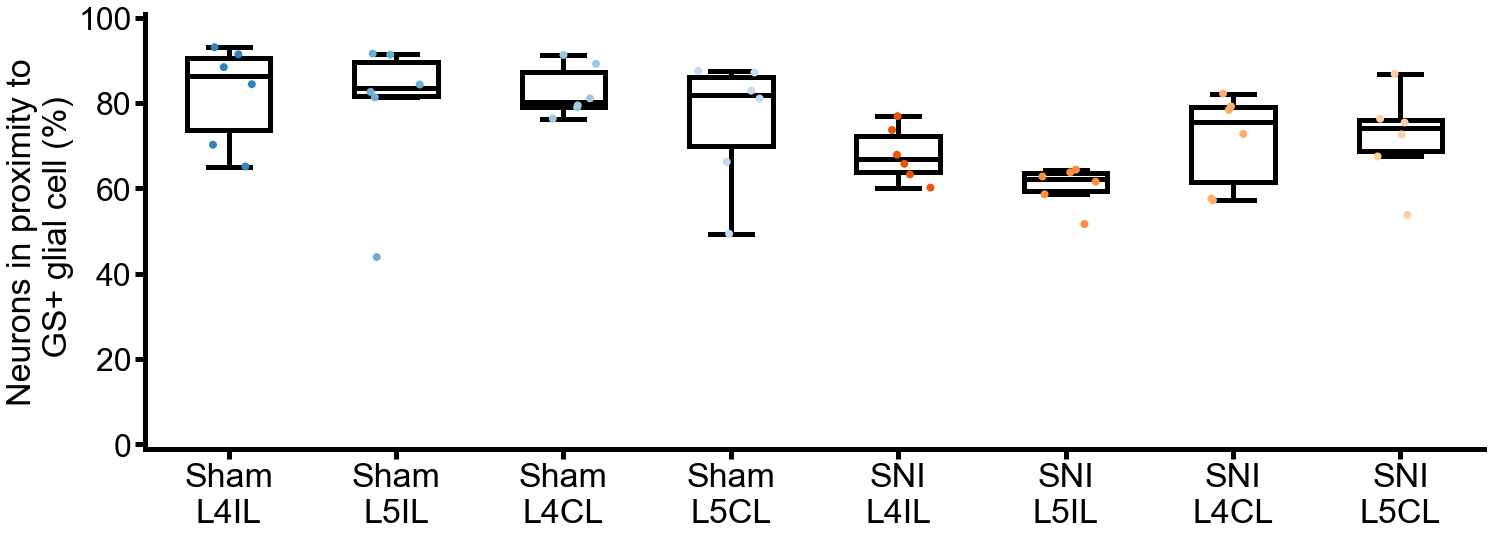

In [8]:
plot_all('ring_ratios_gs', 'Neurons in proximity to\n GS+ glial cell (%)')

In [9]:
statistic_all('ring_ratios_gs')

Mann Whitney U: p-value=0.01086


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.6991,0.8182,0.3095,0.0649,0.0022,0.1320,0.2403
Sham L5IL,0.6991,1.0000,0.3939,0.5887,0.0649,0.0649,0.0931,0.1797
Sham L4CL,0.8182,0.3939,1.0000,0.6991,0.0043,0.0022,0.0931,0.0260
Sham L5CL,0.3095,0.5887,0.6991,1.0000,0.1797,0.0649,0.3095,0.4848
SNI L4IL,0.0649,0.0649,0.0043,0.1797,1.0000,0.0649,0.5887,0.4848
SNI L5IL,0.0022,0.0649,0.0022,0.0649,0.0649,1.0000,0.2403,0.0411
SNI L4CL,0.1320,0.0931,0.0931,0.3095,0.5887,0.2403,1.0000,0.8182
SNI L5CL,0.2403,0.1797,0.0260,0.4848,0.4848,0.0411,0.8182,1.0000


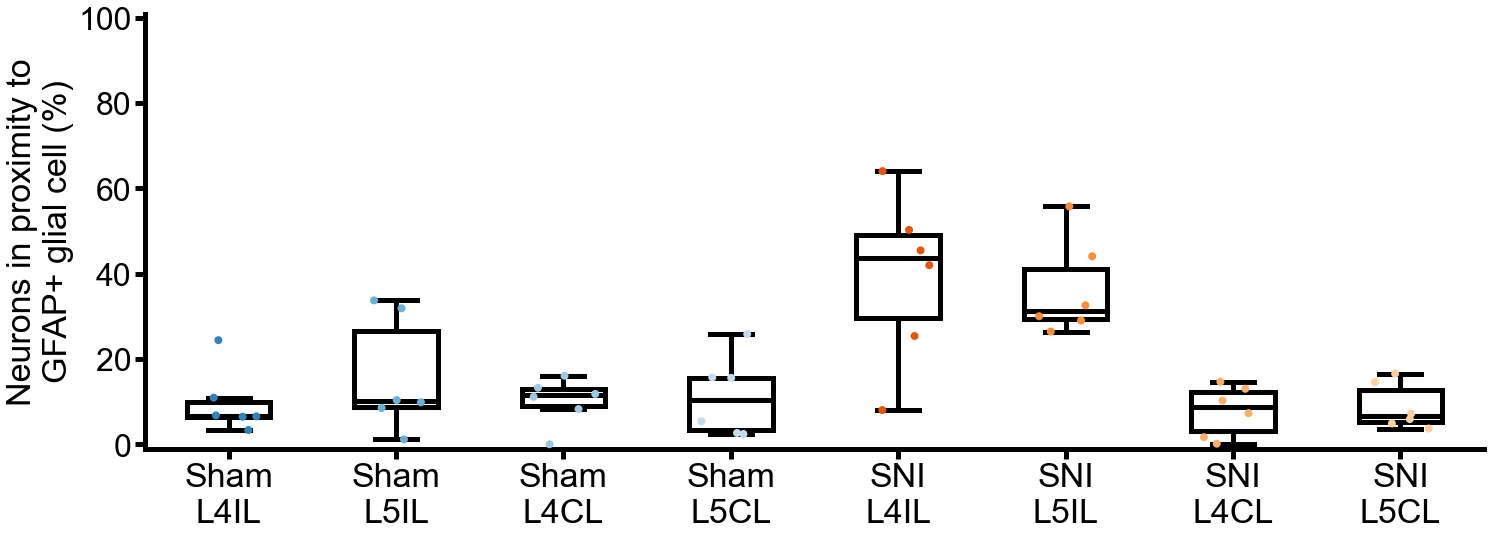

In [10]:
plot_all('ring_ratios_gfap', 'Neurons in proximity to\nGFAP+ glial cell (%)')

In [11]:
statistic_all('ring_ratios_gfap')

Mann Whitney U: p-value=0.00364


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.3939,0.3939,0.9372,0.0087,0.0022,1.0000,0.9372
Sham L5IL,0.3939,1.0000,0.9372,0.6991,0.0931,0.0931,0.4848,0.3939
Sham L4CL,0.3939,0.9372,1.0000,0.9372,0.0411,0.0022,0.5887,0.6991
Sham L5CL,0.9372,0.6991,0.9372,1.0000,0.0260,0.0022,0.3939,1.0000
SNI L4IL,0.0087,0.0931,0.0411,0.0260,1.0000,0.8182,0.0152,0.0087
SNI L5IL,0.0022,0.0931,0.0022,0.0022,0.8182,1.0000,0.0022,0.0022
SNI L4CL,1.0000,0.4848,0.5887,0.3939,0.0152,0.0022,1.0000,0.9372
SNI L5CL,0.9372,0.3939,0.6991,1.0000,0.0087,0.0022,0.9372,1.0000


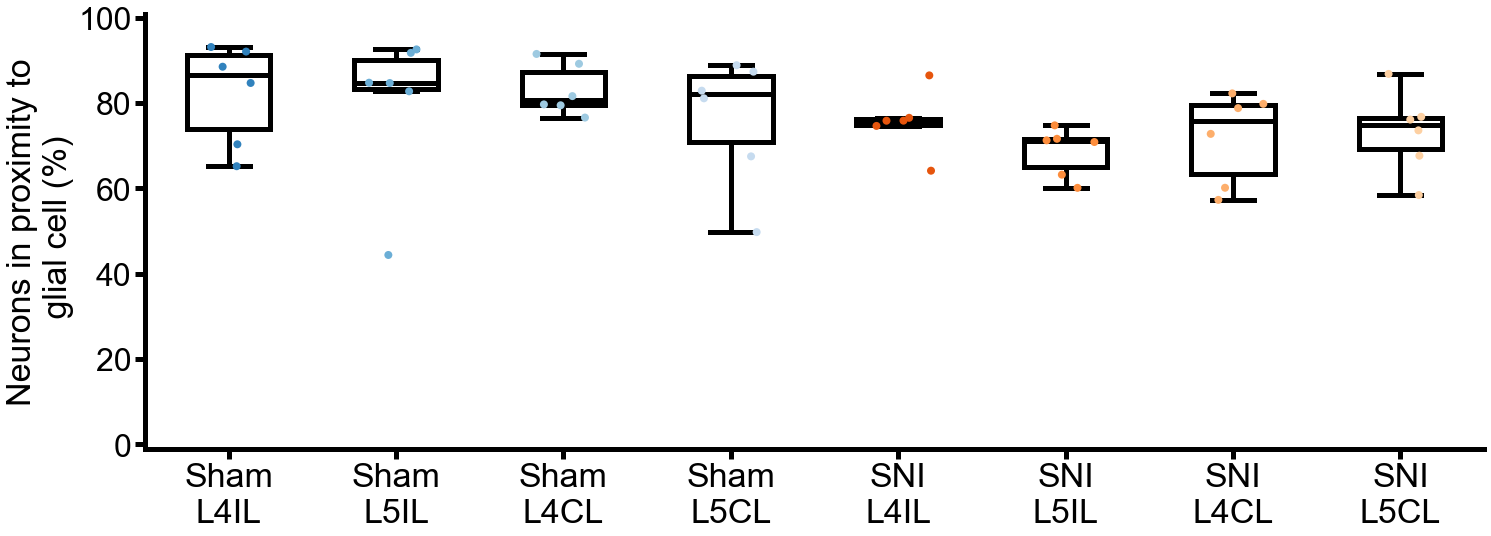

In [12]:
plot_all('ring_ratios_ring', 'Neurons in proximity to\n glial cell (%)')

In [13]:
statistic_all('ring_ratios_ring')

Mann Whitney U: p-value=0.07502


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.8182,0.8182,0.3939,0.3095,0.1320,0.1320,0.2403
Sham L5IL,0.8182,1.0000,0.3939,0.4848,0.1797,0.0649,0.0649,0.1797
Sham L4CL,0.8182,0.3939,1.0000,0.6991,0.0260,0.0022,0.1320,0.0411
Sham L5CL,0.3939,0.4848,0.6991,1.0000,0.4848,0.2403,0.3095,0.4848
SNI L4IL,0.3095,0.1797,0.0260,0.4848,1.0000,0.0411,0.8182,0.9372
SNI L5IL,0.1320,0.0649,0.0022,0.2403,0.0411,1.0000,0.3939,0.3095
SNI L4CL,0.1320,0.0649,0.1320,0.3095,0.8182,0.3939,1.0000,1.0000
SNI L5CL,0.2403,0.1797,0.0411,0.4848,0.9372,0.3095,1.0000,1.0000


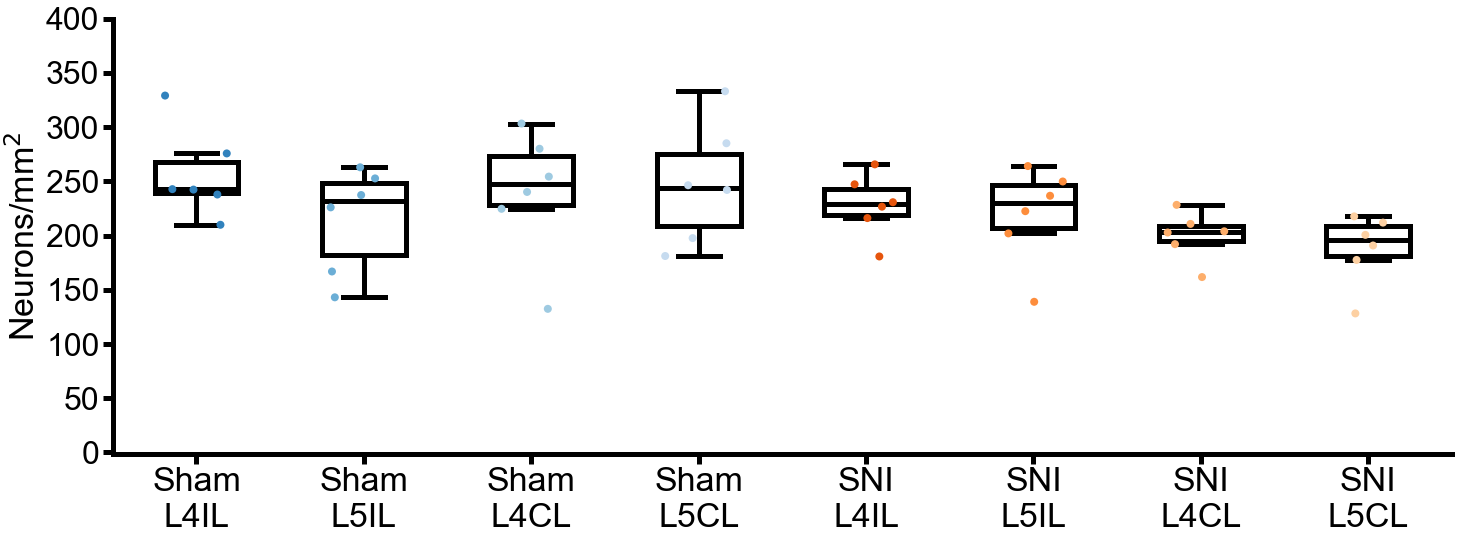

In [12]:
plot_all('neurons_per_tissue', 'Neurons/mm$^2$')

In [13]:
statistic_all('neurons_per_tissue')

one-way ANOVA: p-value=0.12668


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.5749,0.1972,0.0147,0.1426,0.7649,0.1646,0.0097
Sham L5IL,0.5749,1.0000,0.6834,0.1603,0.4550,0.8061,0.5213,0.0928
Sham L4CL,0.1972,0.6834,1.0000,0.0900,0.5850,0.4609,0.6925,0.0479
Sham L5CL,0.0147,0.1603,0.0900,1.0000,0.5107,0.0813,0.3718,0.4686
SNI L4IL,0.1426,0.4550,0.5850,0.5107,1.0000,0.3047,0.8799,0.2847
SNI L5IL,0.7649,0.8061,0.4609,0.0813,0.3047,1.0000,0.3518,0.0473
SNI L4CL,0.1646,0.5213,0.6925,0.3718,0.8799,0.3518,1.0000,0.1974
SNI L5CL,0.0097,0.0928,0.0479,0.4686,0.2847,0.0473,0.1974,1.0000


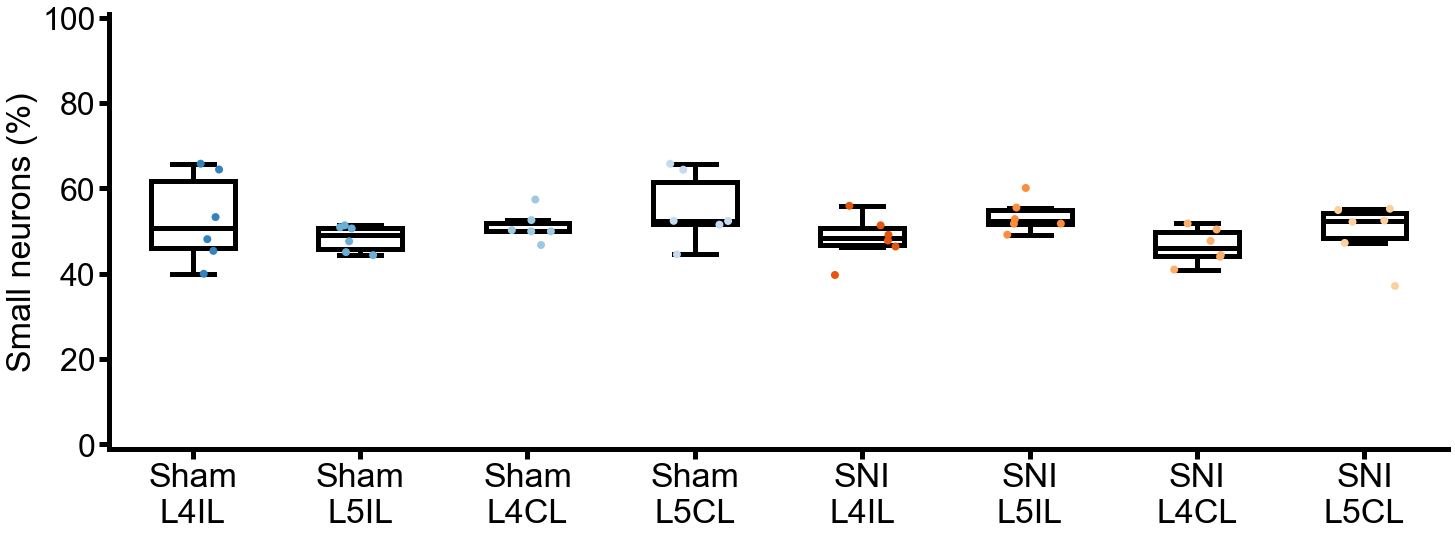

In [14]:
plot_all('small_neurons_percentage', 'Small neurons (%)')

In [15]:
statistic_all('small_neurons_percentage')

one-way ANOVA: p-value=0.24252


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.7141,0.3758,0.2001,0.3336,0.6769,0.8835,0.5730
Sham L5IL,0.7141,1.0000,0.3233,0.0669,0.1756,0.2977,0.2921,0.6955
Sham L4CL,0.3758,0.3233,1.0000,0.5223,0.9791,0.1227,0.0868,0.6876
Sham L5CL,0.2001,0.0669,0.5223,1.0000,0.4200,0.0449,0.0126,0.3344
SNI L4IL,0.3336,0.1756,0.9791,0.4200,1.0000,0.0857,0.0270,0.6262
SNI L5IL,0.6769,0.2977,0.1227,0.0449,0.0857,1.0000,0.6662,0.2535
SNI L4CL,0.8835,0.2921,0.0868,0.0126,0.0270,0.6662,1.0000,0.2812
SNI L5CL,0.5730,0.6955,0.6876,0.3344,0.6262,0.2535,0.2812,1.0000


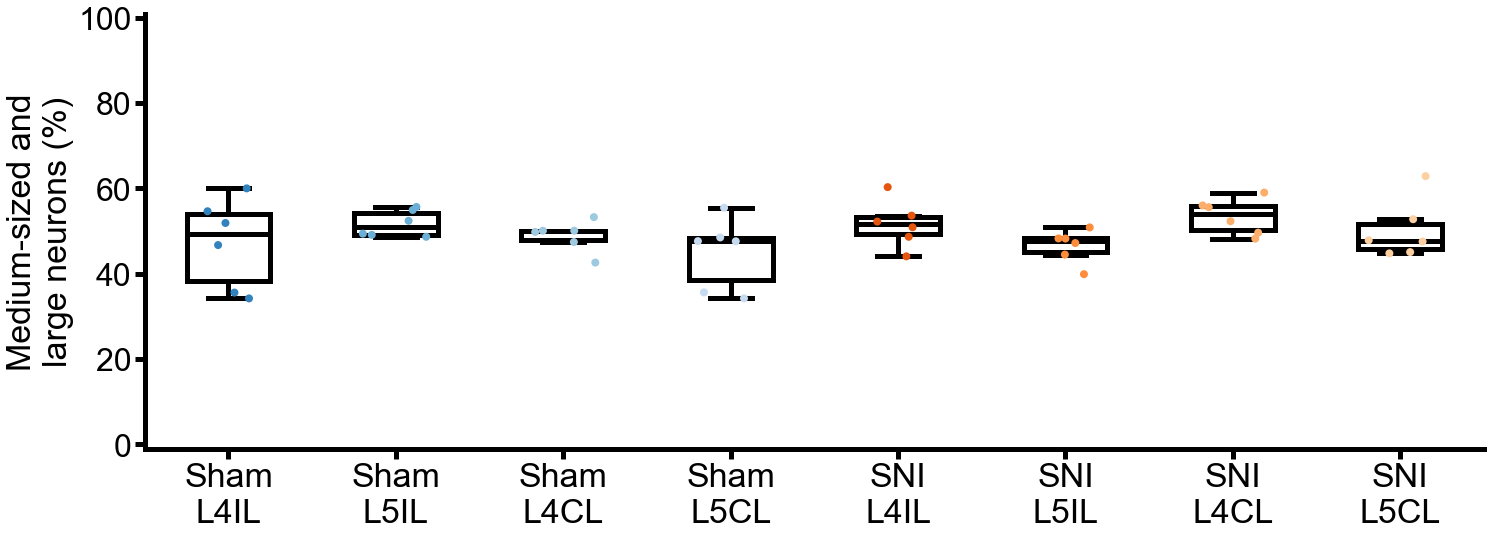

In [16]:
plot_all('bigger_neurons_percentage', 'Medium-sized and\nlarge neurons (%)')

In [17]:
statistic_all('bigger_neurons_percentage')

one-way ANOVA: p-value=0.24252


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.7141,0.3758,0.2001,0.3336,0.6769,0.8835,0.5730
Sham L5IL,0.7141,1.0000,0.3233,0.0669,0.1756,0.2977,0.2921,0.6955
Sham L4CL,0.3758,0.3233,1.0000,0.5223,0.9791,0.1227,0.0868,0.6876
Sham L5CL,0.2001,0.0669,0.5223,1.0000,0.4200,0.0449,0.0126,0.3344
SNI L4IL,0.3336,0.1756,0.9791,0.4200,1.0000,0.0857,0.0270,0.6262
SNI L5IL,0.6769,0.2977,0.1227,0.0449,0.0857,1.0000,0.6662,0.2535
SNI L4CL,0.8835,0.2921,0.0868,0.0126,0.0270,0.6662,1.0000,0.2812
SNI L5CL,0.5730,0.6955,0.6876,0.3344,0.6262,0.2535,0.2812,1.0000


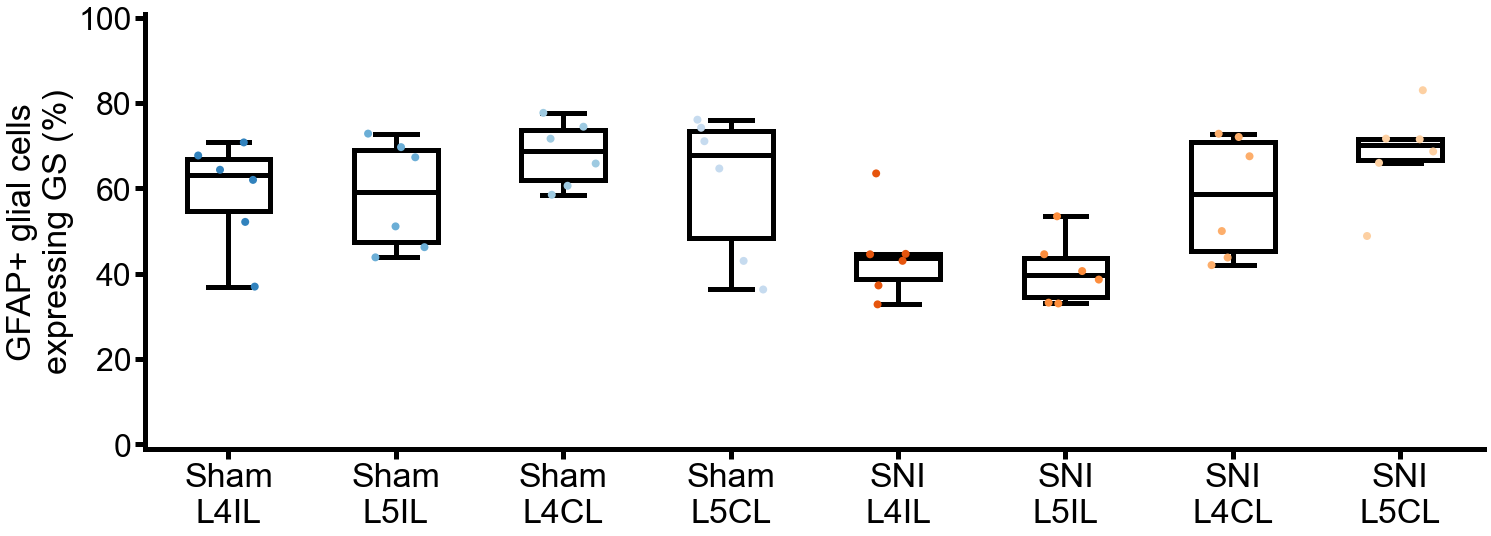

In [18]:
plot_all('gfap_overlaps', 'GFAP+ glial cells\nexpressing GS (%)')

In [19]:
statistic_all('gfap_overlaps')

one-way ANOVA: p-value=0.00172


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.1594,0.0523,0.9039,0.9467,0.8306,0.0119,0.2049
Sham L5IL,0.1594,1.0000,0.0012,0.1601,0.1470,0.3656,0.0001,0.9786
Sham L4CL,0.0523,0.0012,1.0000,0.0879,0.0630,0.0698,0.5006,0.0033
Sham L5CL,0.9039,0.1601,0.0879,1.0000,0.9545,0.7597,0.0254,0.1972
SNI L4IL,0.9467,0.1470,0.0630,0.9545,1.0000,0.7888,0.0152,0.1895
SNI L5IL,0.8306,0.3656,0.0698,0.7597,0.7888,1.0000,0.0239,0.3949
SNI L4CL,0.0119,0.0001,0.5006,0.0254,0.0152,0.0239,1.0000,0.0005
SNI L5CL,0.2049,0.9786,0.0033,0.1972,0.1895,0.3949,0.0005,1.0000


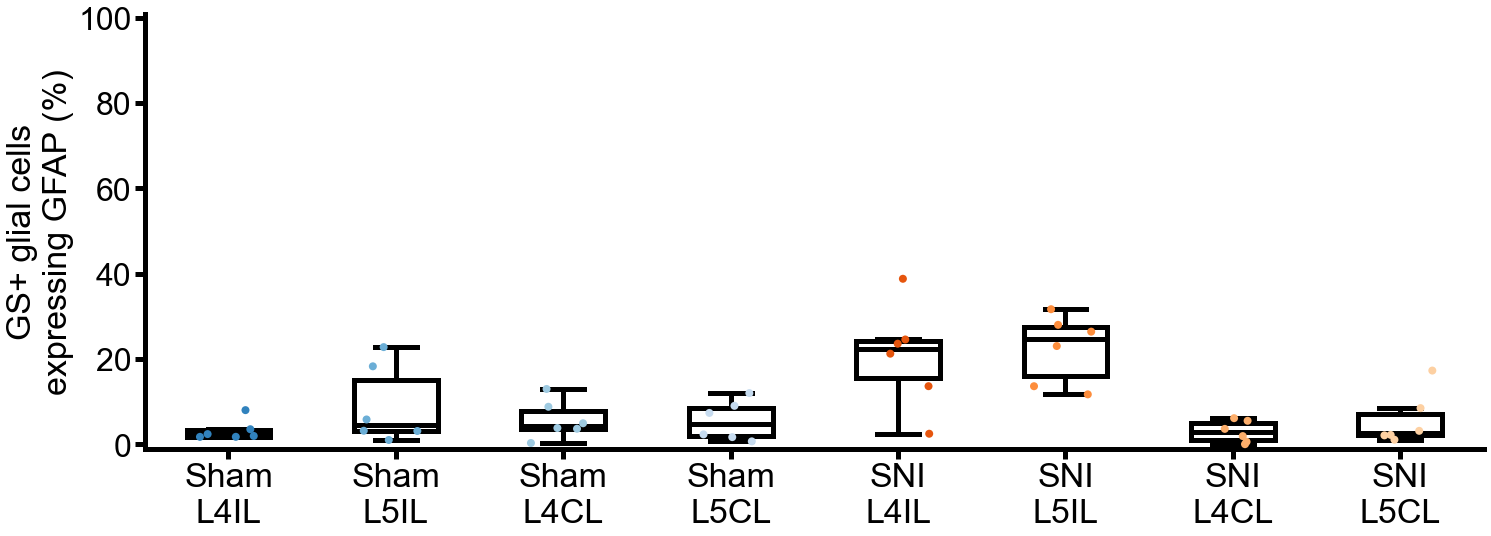

In [20]:
plot_all('gs_overlaps', 'GS+ glial cells\nexpressing GFAP (%)')

In [21]:
statistic_all('gs_overlaps')

Mann Whitney U: p-value=0.00300


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.2980,0.1735,0.8102,0.0131,0.0051,0.9362,0.5752
Sham L5IL,0.2980,1.0000,0.9362,0.5752,0.1282,0.0306,0.2980,0.4712
Sham L4CL,0.1735,0.9362,1.0000,0.9362,0.0453,0.0082,0.2980,0.5752
Sham L5CL,0.8102,0.5752,0.9362,1.0000,0.0202,0.0082,0.2980,0.9362
SNI L4IL,0.0131,0.1282,0.0453,0.0202,1.0000,0.8102,0.0202,0.0306
SNI L5IL,0.0051,0.0306,0.0082,0.0082,0.8102,1.0000,0.0051,0.0131
SNI L4CL,0.9362,0.2980,0.2980,0.2980,0.0202,0.0051,1.0000,0.4712
SNI L5CL,0.5752,0.4712,0.5752,0.9362,0.0306,0.0131,0.4712,1.0000
